In [ ]:
import xarray as xr
import matplotlib.pyplot as plt

# Open the NetCDF file
data = xr.open_dataset('bi_2000.nc')

# Display metadata and variables
print(data)

<xarray.Dataset> Size: 2GB
Dimensions:          (lon: 1386, lat: 585, day: 366, crs: 1)
Coordinates:
  * lon              (lon) float64 11kB -124.8 -124.7 -124.7 ... -67.1 -67.06
  * lat              (lat) float64 5kB 49.4 49.36 49.32 ... 25.15 25.11 25.07
  * day              (day) datetime64[ns] 3kB 2000-01-01 ... 2000-12-31
  * crs              (crs) uint16 2B 3
Data variables:
    burning_index_g  (day, lat, lon) float64 2GB ...
Attributes: (12/19)
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    ...                         ...
    date:                       03 July 2019
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, D

In [ ]:
print(data.dims)
print(data.data_vars)

FrozenMappingWarningOnValuesAccess({'lon': 1386, 'lat': 585, 'day': 366, 'crs': 1})
Data variables:
    burning_index_g  (day, lat, lon) float64 2GB ...


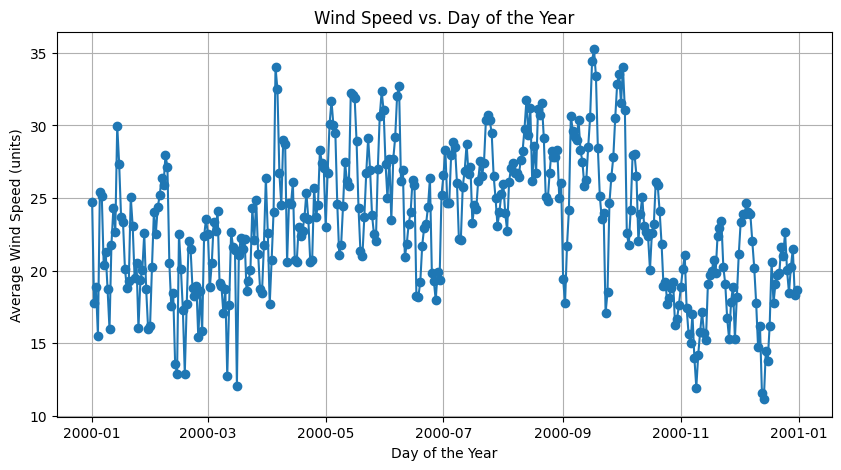

In [ ]:
wind_speed = data['burning_index_g']  # Adjust the variable name accordingly
date = data['day']  # Adjust if the time variable has a different name


# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(date, wind_speed.mean(dim='lat').mean(dim='lon'), marker='o')
plt.title('Wind Speed vs. Day of the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Average Wind Speed (units)')
plt.grid()
plt.show()